In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed

In [2]:
#We use the data from the 2nd gear failure test

data_dir = '2nd_test'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    print(filename)
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep = '\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    merged_data = merged_data.append(dataset_mean_abs)
    
merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']

2004.02.12.10.32.39
2004.02.12.10.42.39
2004.02.12.10.52.39
2004.02.12.11.02.39
2004.02.12.11.12.39
2004.02.12.11.22.39
2004.02.12.11.32.39
2004.02.12.11.42.39
2004.02.12.11.52.39
2004.02.12.12.02.39
2004.02.12.12.12.39
2004.02.12.12.22.39
2004.02.12.12.32.39
2004.02.12.12.42.39
2004.02.12.12.52.39
2004.02.12.13.02.39
2004.02.12.13.12.39
2004.02.12.13.22.39
2004.02.12.13.32.39
2004.02.12.13.42.39
2004.02.12.13.52.39
2004.02.12.14.02.39
2004.02.12.14.12.39
2004.02.12.14.22.39
2004.02.12.14.32.39
2004.02.12.14.42.39
2004.02.12.14.52.39
2004.02.12.15.02.39
2004.02.12.15.12.39
2004.02.12.15.22.39
2004.02.12.15.32.39
2004.02.12.15.42.39
2004.02.12.15.52.39
2004.02.12.16.02.39
2004.02.12.16.12.39
2004.02.12.16.22.39
2004.02.12.16.32.39
2004.02.12.16.42.39
2004.02.12.16.52.39
2004.02.12.17.02.39
2004.02.12.17.12.39
2004.02.12.17.22.39
2004.02.12.17.32.39
2004.02.12.17.42.39
2004.02.12.17.52.39
2004.02.12.18.02.39
2004.02.12.18.12.39
2004.02.12.18.22.39
2004.02.12.18.32.39
2004.02.12.18.42.39


In [14]:
index = []
for filename in os.listdir(data_dir):
    index.append(filename)

index.remove('.ipynb_checkpoints')

merged_data.index = index
    
merged_data.index = pd.to_datetime(merged_data.index, 
                                   format = '%Y.%m.%d.%H.%M.%S')

merged_data = merged_data.sort_index()
merged_data.to_csv('merged_dataset_BearingTest_2.csv')
merged_data.index
merged_data.head()


,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


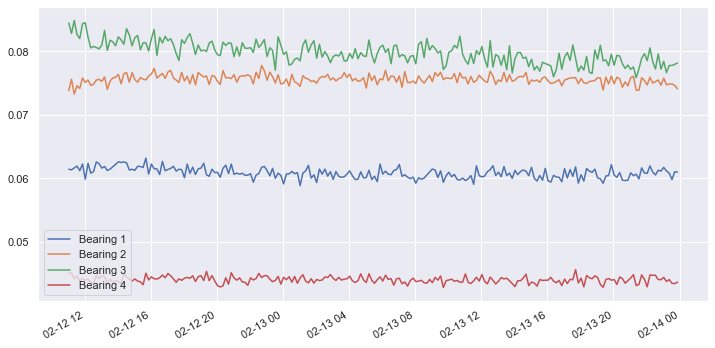

In [18]:
#We now split the data into the train test split

dataset_train = merged_data['2004-02-12 11:02:39':'2004-02-13 23:52:39']
dataset_test = merged_data['2004-02-13 23:52:39':]

dataset_train.plot(figsize = (12, 6))

In [19]:
#We now normalize the data

scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train),
                      columns = dataset_train.columns,
                      index = dataset_train.index)

#Randomly shuffle the training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test),
                     columns = dataset_test.columns,
                     index = dataset_test.index)

In [20]:
#PCA analysis

from sklearn.decomposition import PCA

pca = PCA(n_components =2, svd_solver = 'full')

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

X_test_PCA = pca.fit_transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index

In [21]:
#Calculating covariance matrix

def cov_matrix(data, verbose = False):
    covariance_matrix = np.cov(data, rowvar = False)
    if is_pos_def(covariance_matrix):
        in_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

In [23]:
#Create the Mahalanobis distance:

def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose = False):
    inv_covariance_matrix = inv_cov_matrix
    cars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matris).dot(diff[i])))
    return md

In [25]:
#Detecting Outliers

def MD_detectOutliers(dist, extreme=False, verbose = False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i) #Index of the outlier
    
    return np.array(outliers)
    

In [26]:
#Calculate threshold values for classifying datapoint as anomaly

def MD_threshold(dist, extreme = False, verbose = False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

In [27]:
#Check if matrix is positive definite

def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False
            

In [28]:
#Set up the PCA model
#Define train/test set

data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

#calculate the covariance matrix and its inverse

cov_matrix, inv_cov_matrix = cov_matrix(data_train)

#calculate the mean value for the input values in the training set (used in Mahalanobis distance 
#to datapoints in test set)
mean_distr = data_train.mean(axis = 0)

NameError: name 'inv_covariance_matrix' is not defined